**DESCRIPTION**

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number
- Date - the week of sales
- Weekly_Sales -  sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

**Analysis Tasks**

Basic Statistics tasks

- Which store has maximum sales

- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

- Which store/s has good quarterly growth rate in Q3’2012

- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

- Provide a monthly and semester view of sales in units and give insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Store with maximum sales

In [2]:
d_parser=lambda x:pd.datetime.strptime(x,"%d-%m-%Y")
walmart_df=pd.read_csv('D:\\Data science with Python\\Assignments\\Assessment_1\\Walmart_Store_sales.csv', parse_dates=['Date'],date_parser=d_parser)

C:\Users\FB\AppData\Local\Temp/ipykernel_15488/1205743995.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser=lambda x:pd.datetime.strptime(x,"%d-%m-%Y")


In [3]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [19]:
# Finding highest Weekly_Sales done and respective store

In [22]:
Max=walmart_df['Weekly_Sales'].max();Max


3818686.45

In [27]:
walmart_df['Weekly_Sales'].argmax()

1905

In [30]:
walmart_df.loc[1905,'Store']

14

# Store with max std deviation values 

In [56]:
mean_Sales_vector=walmart_df.groupby(['Store'])[['Weekly_Sales']]

In [58]:
mean_Sales_vector.std()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745
6,212525.855862
7,112585.469220
8,106280.829881
9,69028.666585


In [52]:
max_std=(mean_Sales_vector.std()).max()

In [53]:
max_std

Weekly_Sales    317569.949476
dtype: float64

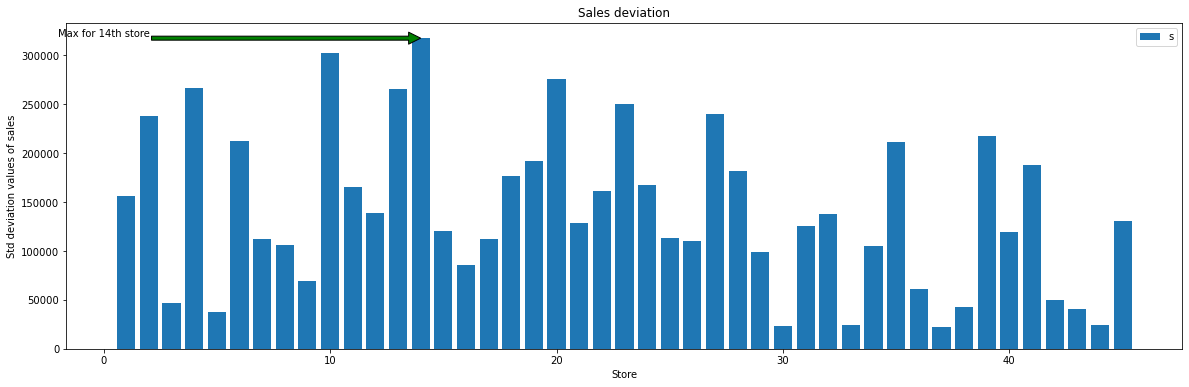

In [63]:
plt.figure(figsize=(20,6))
plt.bar(mean_Sales_vector.std().index.values,mean_Sales_vector.std()['Weekly_Sales'])
plt.axis=('1,45')
plt.xlabel("Store")
plt.ylabel('Std deviation values of sales')
plt.title('Sales deviation')
plt.legend('sales')
plt.annotate('Max for 14th store',ha='center',va='bottom',xytext=(0,317569.949476),xy=(14,317569.949476),arrowprops={'facecolor':'green'})
plt.show()

# Holiday and non-holiday sales comparision


In [172]:
walmart_df.groupby(['Date']).agg({'Weekly_Sales':'sum','Holiday_Flag':'max'})

,Weekly_Sales,Holiday_Flag
Date,,
2010-02-05,49750740.50,0
2010-02-12,48336677.63,1
2010-02-19,48276993.78,0
2010-02-26,43968571.13,0
2010-03-05,46871470.30,0
...,...,...
2012-09-28,43734899.40,0
2012-10-05,47566639.31,0
2012-10-12,46128514.25,0


In [106]:
sum_sales=walmart_df.groupby(['Date']).agg({'Weekly_Sales':'sum','Holiday_Flag':'max'})

In [125]:
holiday_sales_vector=sum_sales.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()

In [126]:
holiday_sales_vector

Holiday_Flag
0    4.685654e+07
1    5.052996e+07
Name: Weekly_Sales, dtype: float64

In [113]:
float(4.685654e+07)

46856540.0

In [130]:

sum_sales.loc[(sum_sales['Holiday_Flag']==1) & (sum_sales['Weekly_Sales']>4.685654e+07)]

,Weekly_Sales,Holiday_Flag
Date,,
2010-02-12,48336677.63,1
2010-11-26,65821003.24,1
2011-02-11,47336192.79,1
2011-11-25,66593605.26,1
2012-02-10,50009407.92,1
2012-09-07,48330059.31,1


In [117]:
stacked=sum_sales.loc[(sum_sales['Holiday_Flag']==1) & (sum_sales['Weekly_Sales']>4.685654e+07)]

In [155]:
indexes=(stacked.index)

In [165]:
iDates=indexes.to_frame(index=None, name=None)

In [166]:
print('holidays which have higher sales than the mean sales in non-holiday season');print(iDates)

holidays which have higher sales than the mean sales in non-holiday season
        Date
0 2010-02-12
1 2010-11-26
2 2011-02-11
3 2011-11-25
4 2012-02-10
5 2012-09-07


# Quarterly high sales in Q3,2012, Store with max sales

In [55]:
Q3_df=walmart_df.set_index('Date',inplace=True)

In [213]:
Q3_df=walmart_df['2012-01-01':'2012-03-31'];Q3_df

C:\Users\FB\AppData\Local\Temp/ipykernel_18880/3037134184.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Q3_df=walmart_df['2012-01-01':'2012-03-31'];Q3_df


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-01-06,1,1550369.92,0,49.01,3.157,219.714258,7.348
2012-01-13,1,1459601.17,0,48.53,3.261,219.892526,7.348
2012-01-20,1,1394393.84,0,54.11,3.268,219.985689,7.348
2012-01-27,1,1319325.59,0,54.26,3.290,220.078852,7.348
2012-02-03,1,1636339.65,0,56.55,3.360,220.172015,7.348
...,...,...,...,...,...,...,...
2012-03-02,45,782796.01,0,41.55,3.816,190.171493,8.424
2012-03-09,45,776968.87,0,45.52,3.848,190.335997,8.424
2012-03-16,45,788340.23,0,50.56,3.862,190.461896,8.424


In [214]:
filt=Q3_df.groupby(['Store'])[['Weekly_Sales']].mean()

In [215]:
filt

,Weekly_Sales
Store,
1,1.594136e+06
2,1.886786e+06
3,4.170623e+05
4,2.148485e+06
5,3.259524e+05
6,1.497534e+06
7,5.994344e+05
8,9.130313e+05
9,5.546141e+05


In [216]:
filt1=filt.rename(columns={'Weekly_Sales':'Mean_values'})

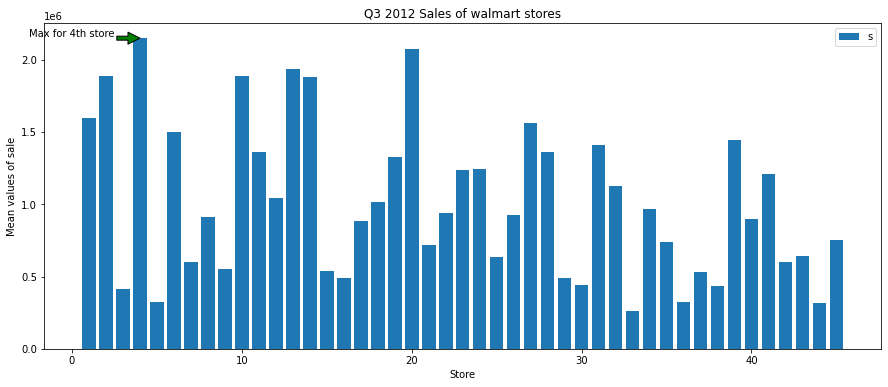

In [217]:
plt.figure(figsize=(15,6))
plt.bar(filt1.index.values,filt1['Mean_values'])
plt.axis=('1,45')
plt.xlabel("Store")
plt.ylabel('Mean values of sale')
plt.title('Q3 2012 Sales of walmart stores')
plt.legend('sales')
plt.annotate('Max for 4th store',ha='center',va='bottom',xytext=(0,2.148485e+06),xy=(4,2.148485e+06),arrowprops={'facecolor':'green'})
plt.show()

In [16]:
#Solution=== max value corr to store 4.So the answer is store 4 made good quarterly growth rate in Q3’2012====

# Monthly and semester view of sales in units and give insights

In [15]:
d_parser=lambda x:pd.datetime.strptime(x,"%d-%m-%Y")
walmart_df=pd.read_csv('D:\\Data science with Python\\Assignments\\Assessment_1\\Walmart_Store_sales.csv', parse_dates=['Date'],date_parser=d_parser)

C:\Users\FB\AppData\Local\Temp/ipykernel_15488/1205743995.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser=lambda x:pd.datetime.strptime(x,"%d-%m-%Y")


In [16]:
Q3_df=walmart_df.set_index('Date')

In [17]:
Q3_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


In [38]:
Q3_df.resample('M').agg({'Weekly_Sales':'mean'}).tail()

,Weekly_Sales
Date,
2012-06-30,1.069379e+06
2012-07-31,1.041719e+06
2012-08-31,1.052670e+06
2012-09-30,1.003586e+06
2012-10-31,1.024232e+06


In [31]:
Q3_df.resample('6M').agg({'Weekly_Sales':'mean'}).tail()

,Weekly_Sales
Date,
2011-02-28,1.056478e+06
2011-08-31,1.022064e+06
2012-02-29,1.079750e+06
2012-08-31,1.048698e+06
2013-02-28,1.013909e+06


In [23]:
monthly_sales,semesterly_sales=Q3_df.resample('M').agg({'Weekly_Sales':'mean'}),Q3_df.resample('6M').agg({'Weekly_Sales':'mean'})

In [24]:
monthly_sales.rename(columns={'Weekly_Sales':'Monthly Sales'},inplace=True)

In [25]:
semesterly_sales.rename(columns={'Weekly_Sales':'Semesterly Sales'},inplace=True)

<AxesSubplot:xlabel='Date'>

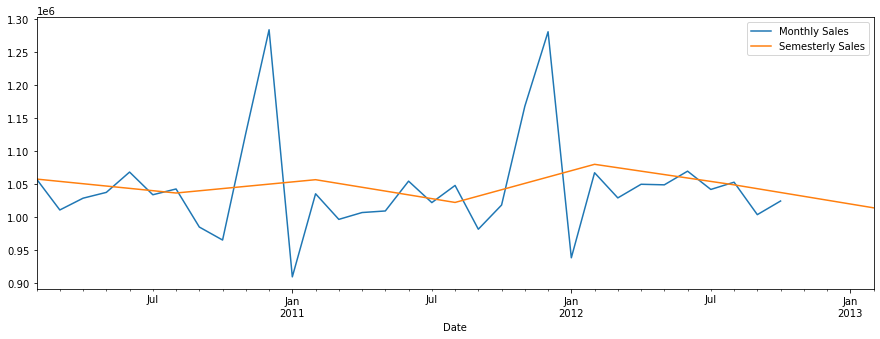

In [26]:
ax=monthly_sales.plot(kind='line',figsize=(15,5))
semesterly_sales.plot(kind='line',ax=ax,figsize=(15,5))

# Semesterly sales dropped to lowest in Aug 2011  while it was recorded as highest in Feb 2012
# Monthly Sales were highest recorded in Dec 2010 while it was lowest in Jan 2011
# During holiday season araound Nov-Dec the sales go up while in other holidays the trend is not so significant
